In [2]:
using Plots
using Random

# Car Racing Agent

Oscar Boutry

Olivier Plantet

Thomas Sentucq

Cédric Tarlé

In [3]:
mutable struct track
    road::Array{Int64}
end

function track(n::Int64)
    track(zeros(n,n))
end

track

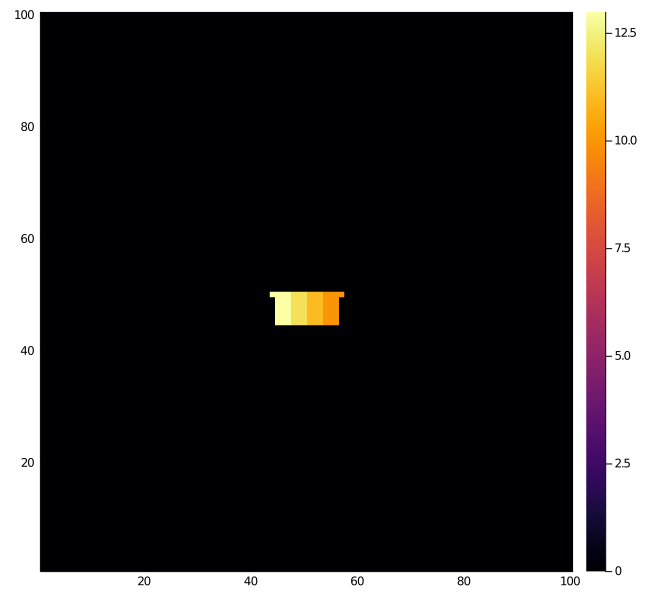

In [4]:
function right!(tr::track,pos::Int64,dir::Int64,larg::Int64,h::Int64)
    r = tr.road
    dir2 = dir%4
    if dir2 == 0
        for i in 0:larg-1
            r[pos + i*n : pos + (larg-1) + i*n] = [h+larg - j for j in 1:larg] #ones(larg)*(h+larg-i)
        end
        pos = pos-1
    end
    if dir2 == 1
        for i in 0:larg-1
            r[pos - i*n : pos + (larg-1) - i*n] = ones(larg)*(h+larg-i)
        end
        pos = pos+n
    end
    
    if dir2 == 2
        for i in 0:larg-1
            r[pos - i*n - (larg-1): pos - i*n] = [j for j in h:h+larg-1] #ones(larg)*(h+larg-i)
        end
        pos = pos+1
    end
    
    if dir2 == 3
        for i in 0:larg-1
            r[pos + i*n - (larg-1): pos + i*n] = ones(larg)*(h+larg-i)
        end
        pos = pos-n
    end
    
    r[pos]=h
    dir = dir-1
    
    (pos,dir)
end


function left!(tr::track,pos::Int64,dir::Int64,larg::Int64,h::Int64)
    r = tr.road
    dir2 = dir%4
    if dir2 == 0
        for i in 0:larg-1
            r[pos + i*n : pos + (larg-1) + i*n] = [j for j in h:h+larg-1] #ones(larg)*(h+i)
        end
        pos = pos+(larg)*(n+1)-n
    end
    
    if dir2 == 1
        for i in 0:larg-1
            r[pos - i*n : pos + (larg-1) - i*n] = ones(larg)*(h+i)
        end
        pos = pos-(larg)*(n-1)-1
    end
    
    if dir2 == 2
        for i in 0:larg-1
            r[pos - i*n - (larg-1): pos - i*n] = [h+larg - j for j in 1:larg] # ones(larg)*(h+i)
        end
        pos = pos-(larg)*(n+1)+n
    end
    
    if dir2 == 3
        for i in 0:larg-1
            r[pos + i*n - (larg-1): pos + i*n] = ones(larg)*(h+i)
        end
        pos = pos+(larg)*(n-1)+1
    end
    
    
    r[pos]=h
    dir = dir+1
    
    (pos,dir)
end

function droit!(tr::track,pos::Int64,dir::Int64,larg::Int64,long::Int64,h::Int64)
    r = tr.road
    dir2 = dir%4

    if dir2 == 0
        for i in 0:long-1
            r[pos + i*n : pos + (larg-1) + i*n] = ones(larg)*h
        end
        pos = pos+(long)*n
    end
    
    if dir2 == 1
        for i in 0:larg-1
            r[pos - i*n : pos - i*n + (long-1)] = ones(long)*h
        end
        pos = pos+long
    end
    
    if dir2 == 2
        for i in 0:long-1
            r[pos - i*n - (larg-1) : pos - i*n] = ones(larg)*h
        end
        pos = pos-(long)*n
    end
    
    if dir2 == 3
        for i in 0:larg-1
            r[pos + i*n - (long-1) : pos + i*n] = ones(long)*h
        end
        pos = pos-long
    end
    
    r[pos]=h
    (pos,dir)
end

function long!(tr::track,pos::Int64,dir::Int64,larg::Int64,h::Int64)
    (pos,dir) = droit!(tr::track,pos::Int64,dir::Int64,larg::Int64,3,h)
    (pos,dir) = droit!(tr::track,pos::Int64,dir::Int64,larg::Int64,3,h+1)
    (pos,dir) = droit!(tr::track,pos::Int64,dir::Int64,larg::Int64,3,h+2)
    (pos,dir) = droit!(tr::track,pos::Int64,dir::Int64,larg::Int64,3,h+3)
end

function short!(tr::track,pos::Int64,dir::Int64,larg::Int64,h::Int64)
    droit!(tr::track,pos::Int64,dir::Int64,larg::Int64,3,h)
end

h = 10
n = 100
R = track(n)
pos = 5550
larg = 6

R.road[5550 + n] = 10
dir = 22
long!(R,pos,dir,larg,h)

plot(heatmap(R.road),size=(650,600))

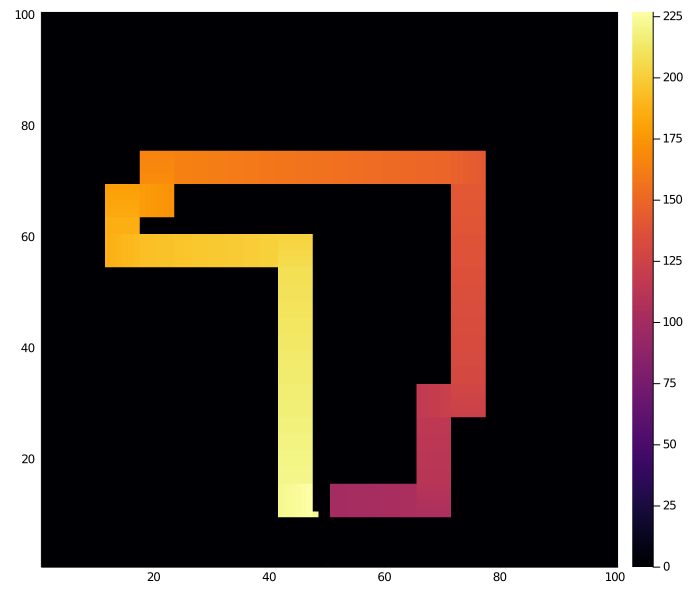

In [16]:
function build!(tr::track,L::Array{Int64})
    pos = 5010
    dir = 100
    tr.road[5001-n] = 1
    
    h = 100
    for i in L
        if i == 1
            (pos,dir) = short!(tr,pos,dir,larg,h)
        end
        
        if i == 2
            (pos,dir) = long!(tr,pos,dir,larg,h)
            h = h+3
        end
        
        if i == 3
            (pos,dir) = right!(tr,pos,dir,larg,h)
            h = h+larg
        end
        
        if i == 4
            (pos,dir) = left!(tr,pos,dir,larg,h)
            h = h+larg
        end
        h = h + 1
    end
end

R1 = track(n)
L = [1,2,4,2,3,4,2,2,2,4,2,2,2,2,4,3,4,1,4,2,2,3,2,2,1,2,4]

build!(R1,L)
plot(heatmap(R1.road),size=(700,600))

In [6]:
mutable struct car
    x::Float64
    y::Float64
    v::Float64
    angle::Float64
    a::Float64
    braq::Float64
    vmax::Float64
end

function car(x::Float64,y::Float64)
    car(x,y,0,0,5,5,10)
end

car

In [7]:
function move!(Car::car,input::Int64,dt::Float64)
    delta = Car.v*dt
    
    if input == 1 || input == 2 || input == 8
        if Car.v<Car.vmax
            delta = delta + 0.5*Car.a*(dt^2)
            Car.v = Car.v + Car.a*dt
        end
    end
    
    if input == 1 || input == 2 || input == 8
        if Car.v<Car.vmax
            #delta = delta + 0.5*Car.a*(dt^2)
            Car.v = Car.v + Car.a*dt
        end
    end
    
    if input == 4 || input == 5 || input == 6
        if Car.v<Car.vmax
            #delta = delta - 0.5*Car.a*(dt^2)
            Car.v = Car.v - Car.a*dt
        end
    end
    
    if input == 2 || input == 3 || input == 4
        Car.angle = Car.angle - delta/Car.braq
    end
    
    if input == 6 || input == 7 || input == 8
        Car.angle = Car.angle + delta/Car.braq
    end
    
    Car.x = Car.x + cos(Car.angle)*delta
    Car.y = Car.y + sin(Car.angle)*delta
end

move! (generic function with 1 method)

In [8]:
function trajectoire(Car::car,L::Array{Int64},dt::Float64)
    X = zeros(length(L))
    Y = zeros(length(L))
    for i in eachindex(L)
        move!(Car,L[i],dt)
        X[i] = Car.x
        Y[i] = Car.y
    end
    (X,Y)
end

len = 100
dt = 0.06
Car = car(0.0,0.0)
X = zeros(len)
Y = zeros(len)


T = [1, 7, 3, 1, 1, 1, 1, 1, 7, 1]

for i in eachindex(T)
#    if rand()<1/6
#        move!(Car,2,dt)
#        
#    elseif 1/6<rand()<4/6
#        move!(Car,7,dt)
#    else
#        move!(Car,1,dt)
#    end
    move!(Car,T[i],dt)
    X[i] = Car.x
    Y[i] = Car.y
end

#plot(scatter(X,Y,xlim = (-30,30), ylim = (-50,30)))
    

In [9]:
mutable struct Ind
    genes::Array{Int64}
    fitness::Int64
end

function Ind(n::Int64)
    genes = ones(n)
    for i in eachindex(genes)
        if rand()<1/3
            genes[i] = 7
        elseif rand()>2/3
            genes[i]= 3
        end
    end
    Ind(genes,0)
end

Ind

In [10]:
function mutate!(ind::Ind;p = 1/nInd)
    for i in eachindex(ind.genes)
        if rand()<p
            if rand()<1/3
                ind.genes[i] = 7
            elseif rand()>2/3
                ind.genes[i]= 3
            else
                ind.genes[i] = 1
            end
        end
    end
end

mutate! (generic function with 1 method)

In [11]:
function evaluate!(ind::Ind,tr::track,CAR::car,dt::Float64)
    (X,Y) = trajectoire(CAR,ind.genes,dt)
    values = ones(nInd)
    i = 2
    while i < nInd && values[i-1]>0
        #println(values[i])
        x = Int(round(X[i]+52))
        y = Int(round(Y[i]+13))
        
        if 0<x<n && 0<y<n
            values[i] = tr.road[y,x]
            #println(values[i])
        end
        
        i = i+1
    end
    ind.fitness = maximum(values)
end

function trajInd(ind::Ind,CAR::car,dt::Float64)
    (X,Y) = trajectoire(CAR,ind.genes,dt)
    values = ones(nInd)
    i = 1
    
    (X+ones(nInd)*52,Y+ones(nInd)*13)
end

function affichage(ind::Ind,tr::track,CAR::car,dt::Float64)
    tr2 = track(n)
    tr2.road = copy(tr.road)
    (X,Y) = trajectoire(CAR,ind.genes,dt)
    i = 1
    while i < nInd
        x = Int(round(X[i]+52))
        y = Int(round(Y[i]+13))
        
        if 0<x<n && 0<y<n
            tr2.road[y,x] = 300
            #println(values[i])
        end
        
        i = i+1
    end
    tr2.road
end


affichage (generic function with 1 method)

104.0


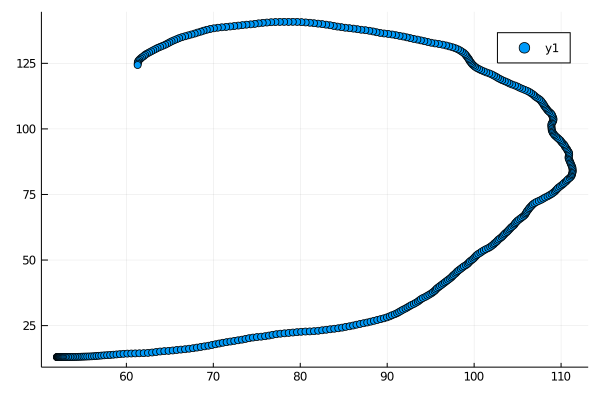

In [12]:
Car1 = car(0.0,0.0)
dt = 0.05
nInd = 430
first = Ind(nInd)
#(X,Y) = trajectoire(Car1,first.genes,dt)
#plot(scatter(X,Y))
println(evaluate!(first,R1,Car1,dt))

child = Ind(nInd)
child.genes = copy(first.genes)

plot(scatter(trajInd(first,car(0.0,0.0),dt)))

In [13]:
for i in 1:1000
    child.genes = copy(first.genes)
    mutate!(child)
    evaluate!(child,R1,car(0.0,0.0),dt)
    if child.fitness >= first.fitness
        first.genes = copy(child.genes)
        evaluate!(first,R1,car(0.0,0.0),dt)
        #println("ok")
    end
    #println("C", child.fitness)
    #println(first.fitness)
end

first.fitness

118

220.0


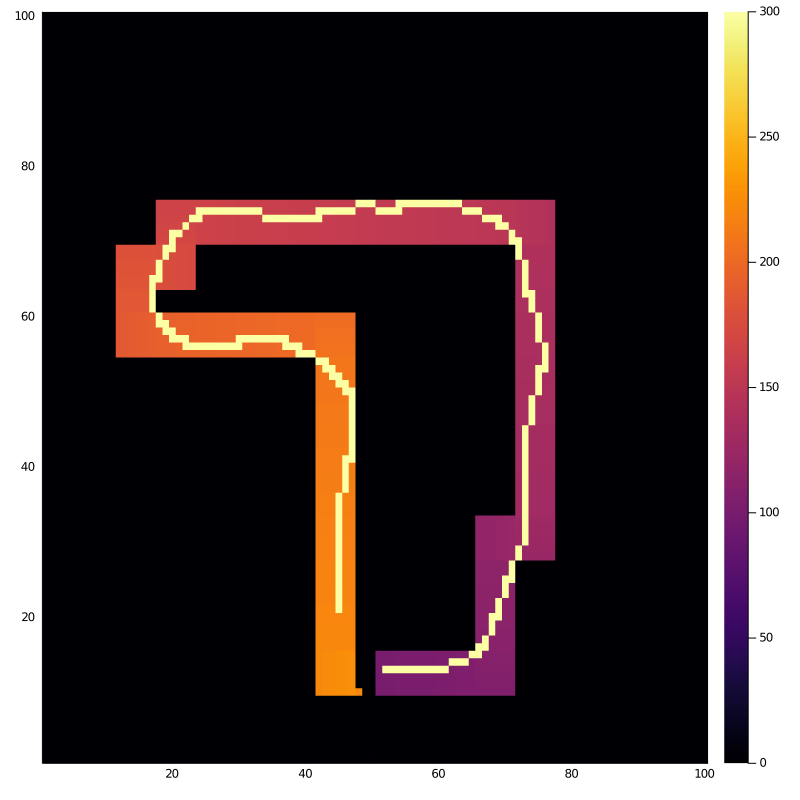

In [776]:
#plot(heatmap(R1.road), scatter(trajInd(child,car(0.0,0.0),dt)), size = (1000,400))
println(evaluate!(first,R1,car(0.0,0.0),dt))
plot(heatmap(affichage(first,R1,car(0.0,0.0),dt)),size = (800,800))

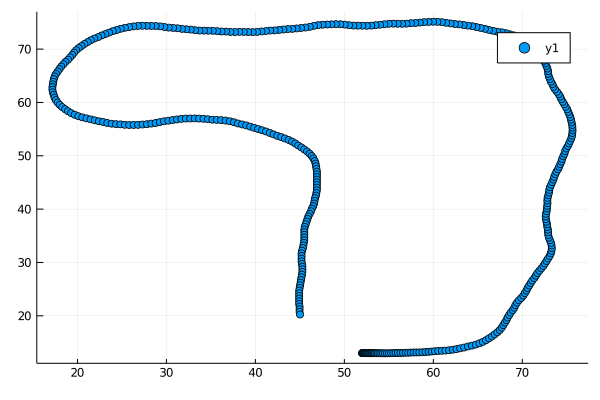

In [777]:
plot(scatter(trajInd(first,car(0.0,0.0),dt)))